# Import

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import json
import folium # pour affichage des données géographiques
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_tree = pd.read_csv('../data/original/ESP_PUBLIC.IDENTITE_ARBRE.csv')

In [3]:
len(df_tree)

31610

In [4]:
df_tree

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,28796,ESP29533,ESP29533,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7330521059871..."
1,28802,ESP29534,ESP29534,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7396645998576..."
2,28805,ESP29535,ESP29535,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7393760050367..."
3,28814,ESP29537,ESP29537,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7327578896097..."
4,24990,ESP29538,ESP29538,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7101806683940..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31605,46021,ESP41555,ESP41555,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7362096829728..."
31606,46022,ESP41556,ESP41556,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7355397923023..."
31607,46023,ESP41557,ESP41557,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7353772851058..."
31608,15434,ESP18761,ESP18761,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7242110392924..."


In [5]:
# on extrait la lat,longitude de la col geojson 

df_tree_json = pd.json_normalize(df_tree.GeoJSON.apply(json.loads))
df_tree  = pd.concat([df_tree,df_tree_json],axis=1)
df_tree[['longitude','latitude']] = pd.DataFrame(df_tree['coordinates'].to_list(),columns=['longitude','latitude'])
df_tree = df_tree.drop(['GeoJSON','type','coordinates'],axis=1)

In [6]:
len(df_tree)

31610

In [7]:
df_tree

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,longitude,latitude
0,28796,ESP29533,ESP29533,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.733052,45.160874
1,28802,ESP29534,ESP29534,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.739665,45.163463
2,28805,ESP29535,ESP29535,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.739376,45.163737
3,28814,ESP29537,ESP29537,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,5.732758,45.165827
4,24990,ESP29538,ESP29538,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.710181,45.175196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31605,46021,ESP41555,ESP41555,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.736210,45.195236
31606,46022,ESP41556,ESP41556,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.735540,45.195325
31607,46023,ESP41557,ESP41557,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.735377,45.195194
31608,15434,ESP18761,ESP18761,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,5.724211,45.192098


In [8]:
df_tree.columns

Index(['ELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE',
       'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE',
       'GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE',
       'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION',
       'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU',
       'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE',
       'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE',
       'longitude', 'latitude'],
      dtype='object')

# Visualization

### Visualization missing data pattern

In [9]:
df_tree.isna().sum().div(len(df_tree)).sort_values(ascending=False)

EQUIPE                   1.000000
CAUSEABATTAGE            1.000000
DIAMETREARBRE            1.000000
ESSOUCHEMENT             1.000000
ANNEEABATTAGE            1.000000
COURRIER                 1.000000
TYPEIMPLANTATIONPLU      0.981019
INTITULEPROTECTIONPLU    0.981019
IDENTIFIANTPLU           0.981019
TRAITEMENTCHENILLES      0.932363
RAISONDEPLANTATION       0.896868
VARIETE                  0.855457
REMARQUES                0.832110
STADEDEDEVELOPPEMENT     0.101297
ESPECE                   0.077950
ANNEEDEPLANTATION        0.042771
GENRE_BOTA               0.025055
COLLECTIVITE             0.014900
longitude                0.000000
ELEM_POINT_ID            0.000000
CODE                     0.000000
BIEN_REFERENCE           0.000000
ADR_SECTEUR              0.000000
CODE_PARENT_DESC         0.000000
CODE_PARENT              0.000000
SOUS_CATEGORIE_DESC      0.000000
SOUS_CATEGORIE           0.000000
CATEGORIE_DESC           0.000000
CATEGORIE                0.000000
GENRE_DESC    

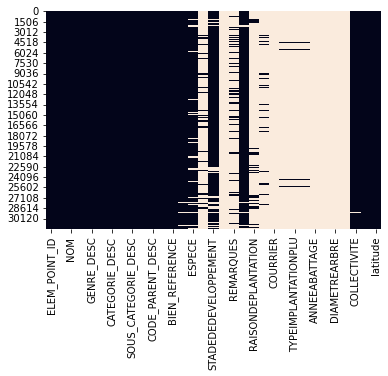

In [10]:
sns.heatmap(df_tree.isnull(), cbar=False);

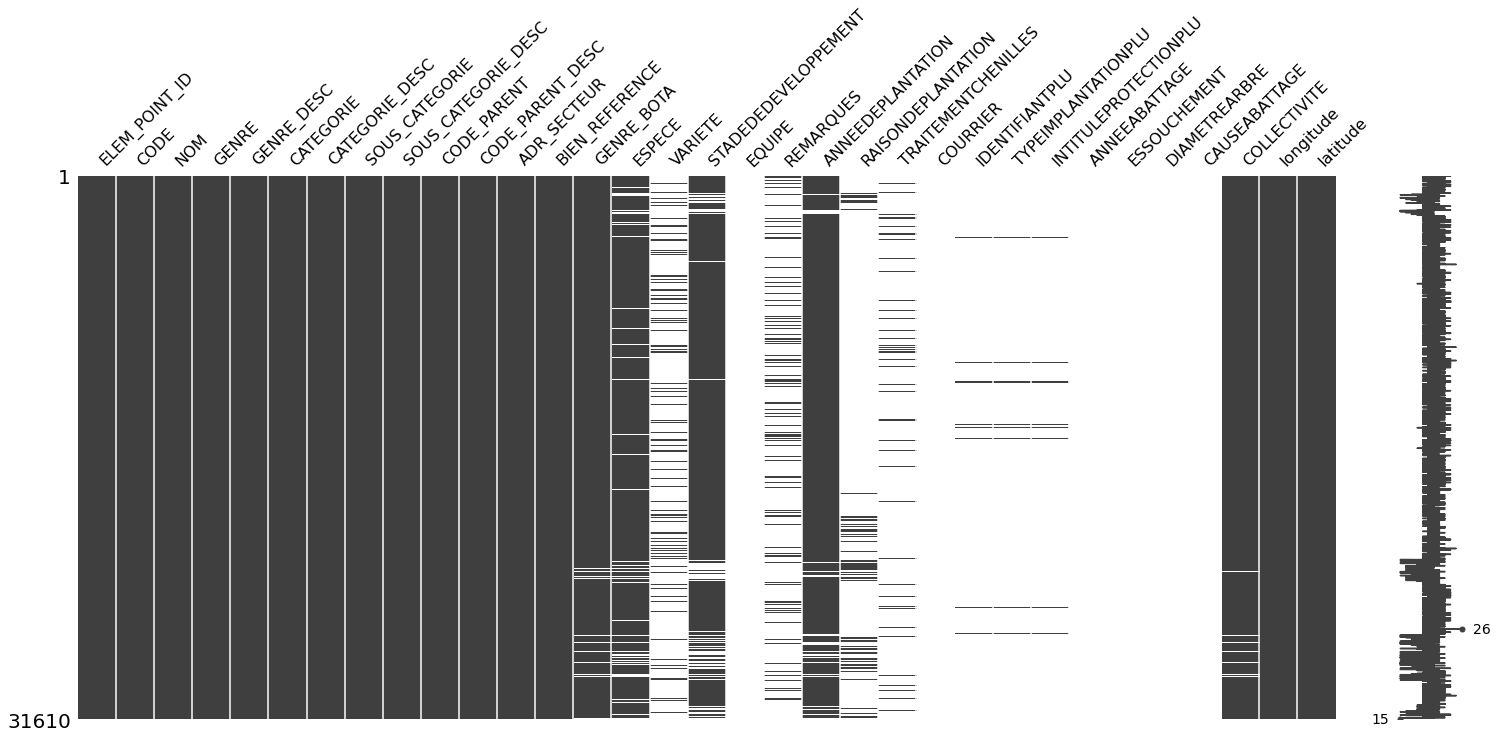

In [11]:
msno.matrix(df_tree);

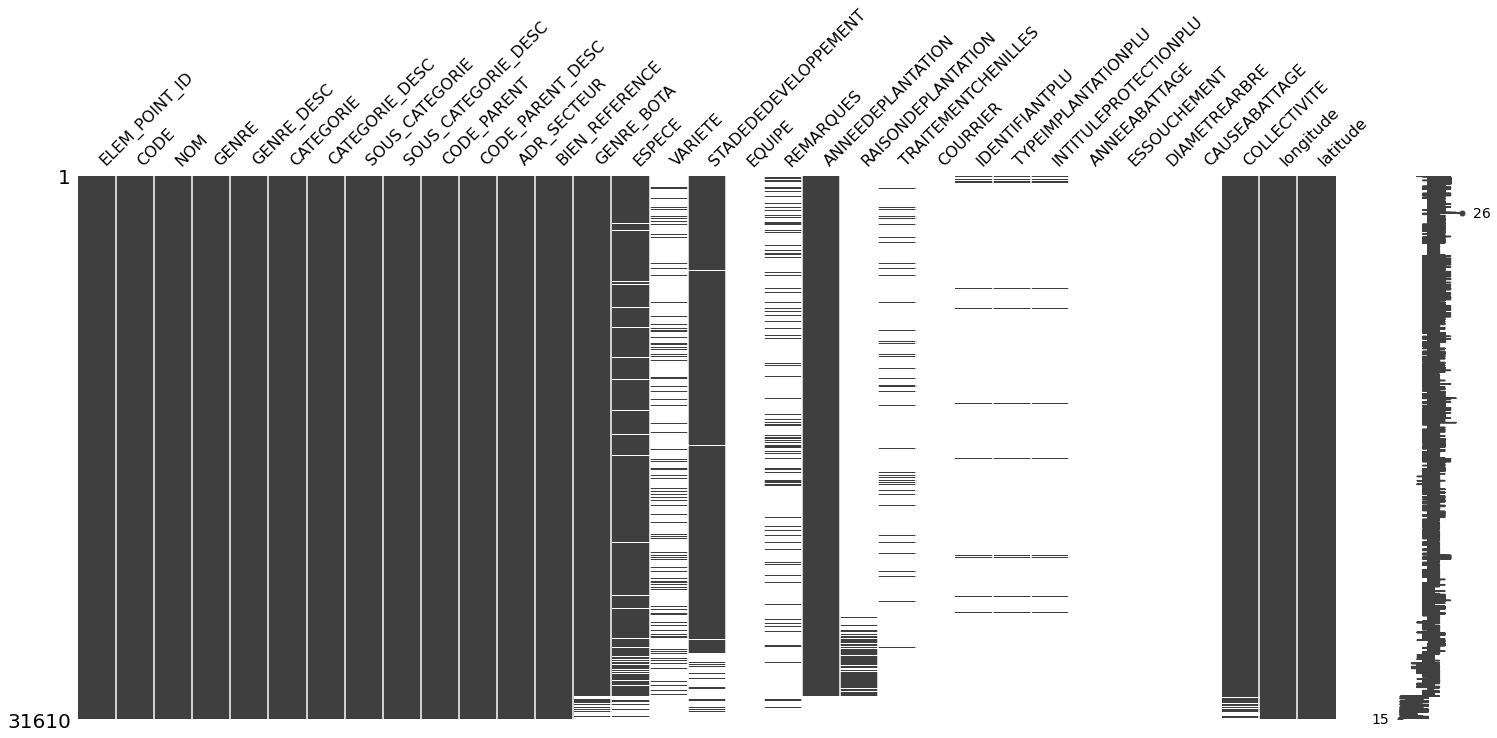

In [12]:
msno.matrix(df_tree.sort_values('ANNEEDEPLANTATION'));

On observe une augmentation de la raison de plantation en fonction de l'année de plantation:
- On ajoute plus de données maintenant qu'avant

## Visualization using geographical data

### Matplotlib

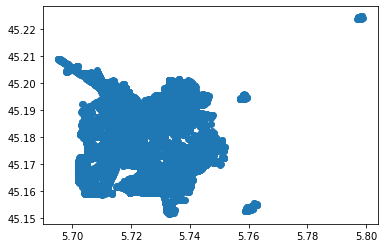

In [13]:
plt.scatter(data=df_tree,x='longitude',y='latitude');

### Folium

In [14]:
path_export_map = '../visu/grenoblemap.html'

In [15]:
location_gre=[45.166672,5.71667]
grenoble = folium.Map(location = location_gre,zoom_start=13)

for i,row in df_tree.iterrows():
    loc = (row['latitude'],row['longitude'])
    if np.isnan(row['ANNEEDEPLANTATION']):
        folium.Circle(loc,radius=1,fill_opacity=0.8,color='red').add_to(grenoble)
    else:
        folium.Circle(loc,radius=1,fill_opacity=0.8,color='green').add_to(grenoble)
grenoble.save(path_export_map)

In [16]:
path_export_map_collectivite = '../visu/grenoblemap_collectivite.html'

In [17]:
location_gre=[45.166672,5.71667]
grenoble = folium.Map(location = location_gre,zoom_start=13)

for i,row in df_tree.iterrows():
    loc = (row['latitude'],row['longitude'])
    if row['COLLECTIVITE']=='Ville de Grenoble':
        folium.Circle(loc,radius=1,fill_opacity=0.8,color='blue').add_to(grenoble)
    else:
        folium.Circle(loc,radius=1,fill_opacity=0.8,color='green').add_to(grenoble)
grenoble.save(path_export_map_collectivite)

## Visualisation of categorical data

# Clean up

### Preexport of data in pkl for pipeline

In [18]:
df_nomodif = pd.read_csv('../data/original/ESP_PUBLIC.IDENTITE_ARBRE.csv')

In [19]:
first_drop = df_nomodif.dropna(axis = 0,subset=['ANNEEDEPLANTATION'])
first_na = df_nomodif[df_nomodif['ANNEEDEPLANTATION'].isna()]

In [20]:
path_first = '../data/modified/trees_first.pkl'
path_first_na = '../data/modified/trees_first_na.pkl'
first_drop.to_pickle(path_first)
first_na.to_pickle(path_first_na)

## Dropping useless features (1 or len(df) values)

In [21]:
nuni = df_tree.nunique()

In [22]:
nuni

ELEM_POINT_ID            31610
CODE                     31610
NOM                      31610
GENRE                        1
GENRE_DESC                   1
CATEGORIE                    1
CATEGORIE_DESC               1
SOUS_CATEGORIE               4
SOUS_CATEGORIE_DESC          4
CODE_PARENT               1468
CODE_PARENT_DESC          1468
ADR_SECTEUR                  6
BIEN_REFERENCE           31610
GENRE_BOTA                 118
ESPECE                     280
VARIETE                    217
STADEDEDEVELOPPEMENT         3
EQUIPE                       0
REMARQUES                 3021
ANNEEDEPLANTATION           65
RAISONDEPLANTATION           3
TRAITEMENTCHENILLES          3
COURRIER                     0
IDENTIFIANTPLU              45
TYPEIMPLANTATIONPLU          4
INTITULEPROTECTIONPLU        3
ANNEEABATTAGE                0
ESSOUCHEMENT                 0
DIAMETREARBRE                0
CAUSEABATTAGE                0
COLLECTIVITE                 2
longitude                31610
latitude

In [23]:
useless_col = nuni.where((nuni ==1) | (nuni==len(df_tree))).dropna().index.to_list()
useless_col.remove('latitude')
useless_col.remove('longitude')
useless_col

['ELEM_POINT_ID',
 'CODE',
 'NOM',
 'GENRE',
 'GENRE_DESC',
 'CATEGORIE',
 'CATEGORIE_DESC',
 'BIEN_REFERENCE']

In [24]:
df_tree = df_tree.drop(useless_col,axis=1)

## Dropping features with desc

In [25]:
df_tree.columns

Index(['SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC', 'CODE_PARENT',
       'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA', 'ESPECE', 'VARIETE',
       'STADEDEDEVELOPPEMENT', 'EQUIPE', 'REMARQUES', 'ANNEEDEPLANTATION',
       'RAISONDEPLANTATION', 'TRAITEMENTCHENILLES', 'COURRIER',
       'IDENTIFIANTPLU', 'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU',
       'ANNEEABATTAGE', 'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE',
       'COLLECTIVITE', 'longitude', 'latitude'],
      dtype='object')

In [26]:
desc_col = ['SOUS_CATEGORIE','CODE_PARENT']

In [27]:
df_tree = df_tree.drop(desc_col,axis=1)

## Dropping features without information (all na)

In [28]:
na = df_tree.isna().sum().div(len(df_tree)).sort_values(ascending=False)

In [29]:
threshold_na=0.5

In [30]:
na.where(na>=threshold_na).dropna()

DIAMETREARBRE            1.000000
CAUSEABATTAGE            1.000000
ESSOUCHEMENT             1.000000
ANNEEABATTAGE            1.000000
EQUIPE                   1.000000
COURRIER                 1.000000
INTITULEPROTECTIONPLU    0.981019
TYPEIMPLANTATIONPLU      0.981019
IDENTIFIANTPLU           0.981019
TRAITEMENTCHENILLES      0.932363
RAISONDEPLANTATION       0.896868
VARIETE                  0.855457
REMARQUES                0.832110
dtype: float64

In [31]:
col_na = na.where(na>=threshold_na).dropna().index

In [32]:
df_tree = df_tree.drop(col_na,axis=1)

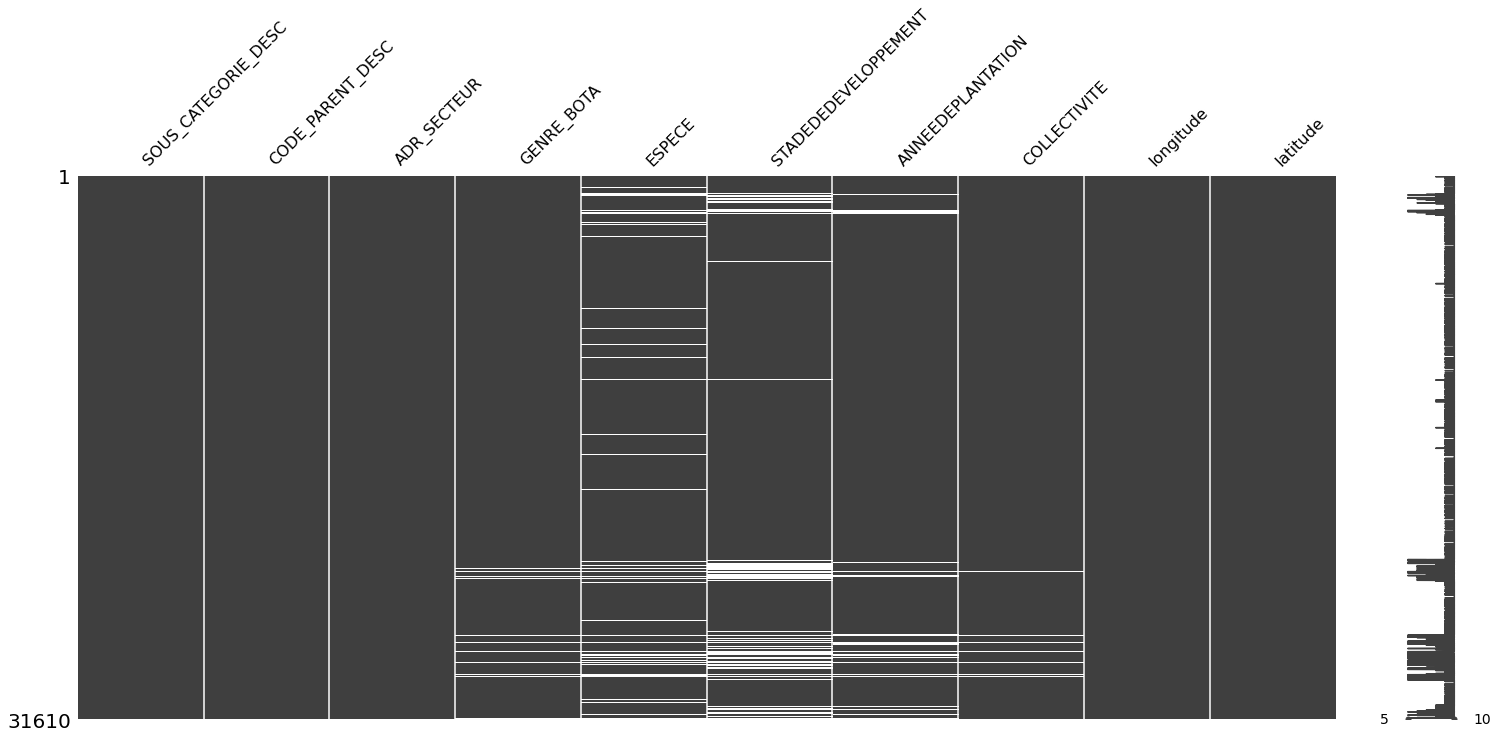

In [33]:
msno.matrix(df_tree);

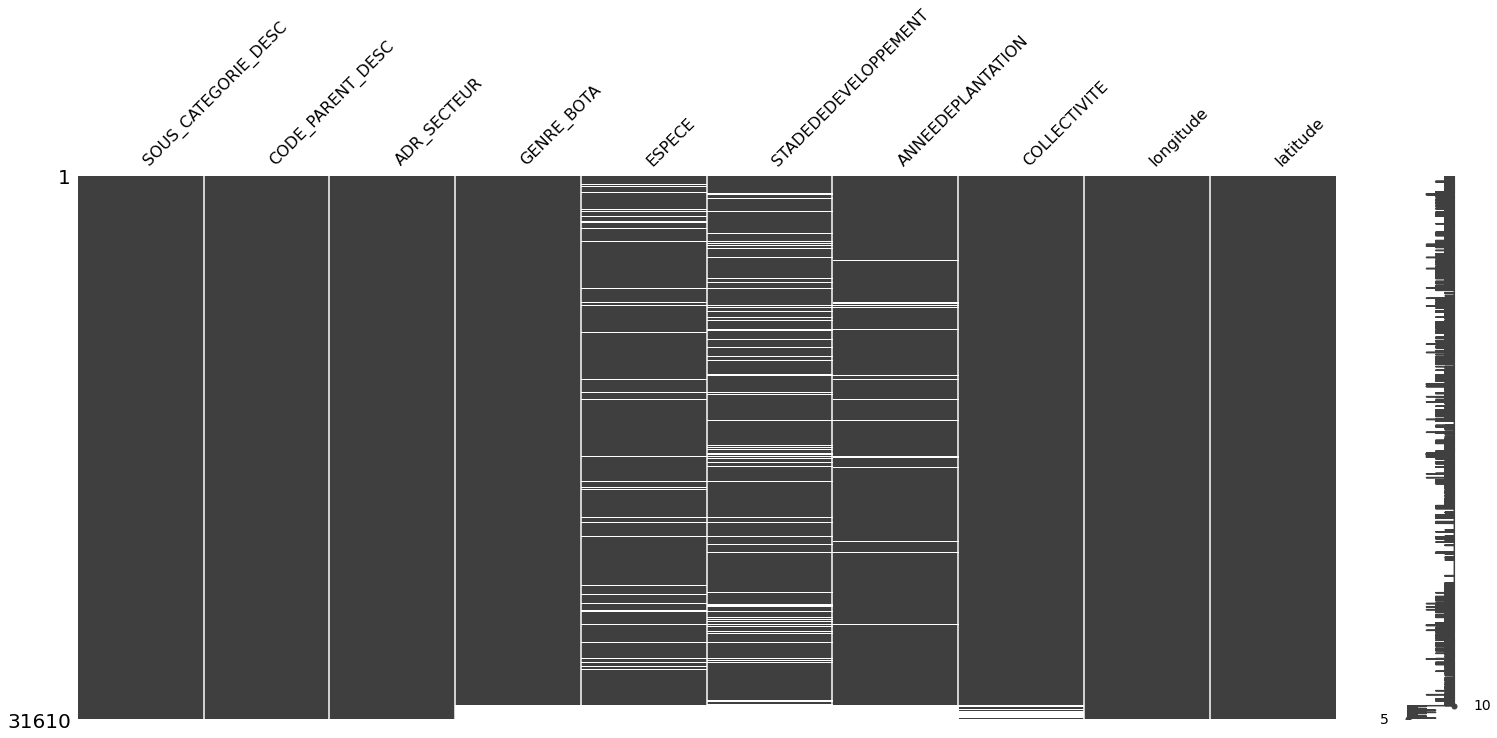

In [34]:
msno.matrix(df_tree.sort_values(by='GENRE_BOTA'));

<AxesSubplot:>

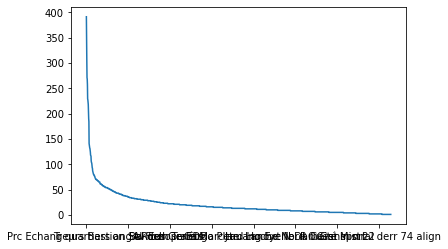

In [43]:
df_tree['CODE_PARENT_DESC'].value_counts().plot()

## Dropping NAN values for année de plantation 

In [35]:
df_tree['ANNEEDEPLANTATION'].isna().value_counts()

False    30258
True      1352
Name: ANNEEDEPLANTATION, dtype: int64

In [36]:
na_trees = df_tree[df_tree['ANNEEDEPLANTATION'].isna()]

In [37]:
df_tree = df_tree.dropna(axis = 0,subset=['ANNEEDEPLANTATION'])

In [38]:
df_tree['ANNEEDEPLANTATION'].isna().value_counts()

False    30258
Name: ANNEEDEPLANTATION, dtype: int64

## Export des données en pickle

In [39]:
path_clean = '../data/modified/trees_clean.pkl'
path_na_tree = '../data/modified/trees_na.pkl'

In [40]:
df_tree.to_pickle(path_clean)
na_trees.to_pickle(path_na_tree)